<a href="https://colab.research.google.com/github/amaziarczyk/Projects/blob/master/Pozosta%C5%82e_projekty/Metoda_K_%C5%9Arednich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda K-Srednich



In [96]:
#Import bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn

In [97]:
# Wygenerowanie danych
from sklearn.datasets import make_blobs

In [98]:
data = make_blobs(n_samples=1000, centers=None, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()


,x1,x2
0,-2.468563,-3.010949
1,-2.009756,-2.452751
2,2.414278,0.865273
3,-1.463040,2.755870
4,-1.263270,2.102571


In [99]:
# Wizualizacja danych
px.scatter(df,
           x='x1',
           y='x2',
           width=700,
           height=400,
           title= ' Wizualizacja danych')

In [100]:
# Import modelu K-Średnich
from sklearn.cluster import KMeans

In [130]:
cluster=KMeans(n_clusters=5)
cluster.fit(df)
y_pred=cluster.predict(df)
df['y_pred']=y_pred
df.head()

,x1,x2,y_pred
0,-2.468563,-3.010949,0
1,-2.009756,-2.452751,3
2,2.414278,0.865273,4
3,-1.463040,2.755870,1
4,-1.263270,2.102571,1


In [131]:
px.scatter(df,
           x='x1',
           y='x2',
           color='y_pred',
           width=700,
           height=400,
           title= ' Wizualizacja danych po podziale na 5 klastrów')

In [103]:
# Suma kwadratów odległości próbek do ich najbliższego środka gromady.
cluster.inertia_

1423.6200062578102

In [104]:
# Budowa listy z Suma kwadratów wewnątrz klastra (Within-Cluster Sum-of-Squared)
wcss=[]
for i in range(2,10):
  cluster=KMeans(n_clusters=i)
  cluster.fit(df)
  wcss.append(cluster.inertia_)

In [105]:
wcss

[6328.563676678414,
 3581.9601181494354,
 2023.6273507728106,
 1423.6087557186308,
 1223.866185639519,
 1105.7753557421809,
 1009.6158662096004,
 907.6314589856139]

In [127]:
df_2=pd.DataFrame(data=wcss, columns=['wcss'])
b=[]
for i in range(1,9):
  b.append(i)

df_2['cluster']=b

df_2.head()

,wcss,cluster
0,6328.563677,1
1,3581.960118,2
2,2023.627351,3
3,1423.608756,4
4,1223.866186,5


In [129]:
len(df_2)

8

In [108]:
px.line(df_2,
           x='cluster',
           y='wcss',
           width=300,
           height=500,
           title= ' Wizualizacja "Metoda łokcia"')

In [115]:
# Podział na 3 klastry zgodnie z Metodą łokcia
cluster=KMeans(n_clusters=3)
cluster.fit(data)
y_pred=cluster.predict(data)
df['y_pred']=y_pred
df.head()

,x1,x2,y_pred
0,-2.468563,-3.010949,1
1,-2.009756,-2.452751,1
2,2.414278,0.865273,0
3,-1.463040,2.755870,2
4,-1.263270,2.102571,2


In [117]:
px.scatter(df,
           x='x1',
           y='x2',
           color='y_pred',
           width=700,
           height=400,
           title= ' Wizualizacja danych po podziale na  3 klastry')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



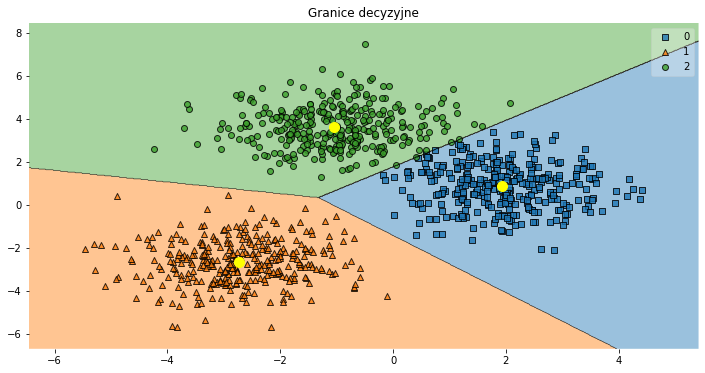

In [121]:
# Wyznaczenie granic decyzyjnych
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 6))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_pred, clf=cluster, legend=1)
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()